   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

/tmp/ipython-input-4-1093448726.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-4-1093448726.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-4-1093448726.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

🔍 Model Performance Comparison:
                            MSE        R2
Deep Learning       5294.241200  0.907487
Random Forest       7718.797028  0.865119
XGBoost            11202.549690  0.804243
Linear Regression  28369.677424  0.504259


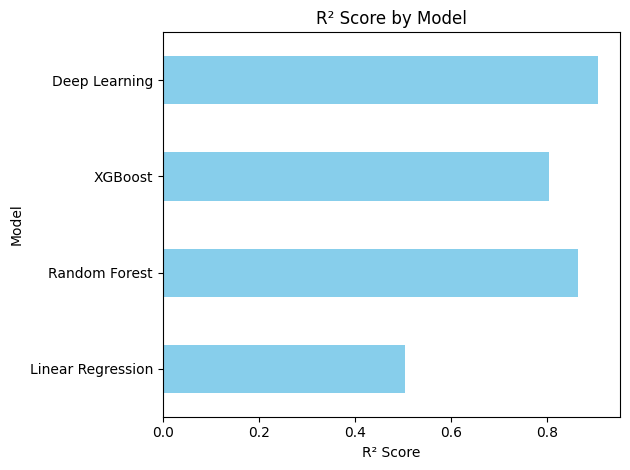

In [4]:
# Superstore Profit Prediction: Machine Learning vs Deep Learning

# 📦 Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 📥 Step 2: Load Data
df = pd.read_csv('superstore.csv', on_bad_lines='skip', encoding='utf-8')
print(df.head())
print(df.info())

# 🧹 Step 3: Clean & Preprocess
df = df.drop(['Order ID', 'Customer Name'], axis=1, errors='ignore')
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('Profit', axis=1)
y = df['Profit']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📂 Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧠 Step 5: Deep Learning Model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
dl_model.compile(optimizer='adam', loss='mse')
dl_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

dl_preds = dl_model.predict(X_test).flatten()
dl_mse = mean_squared_error(y_test, dl_preds)
dl_r2 = r2_score(y_test, dl_preds)

# 🤖 Step 6: Machine Learning Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'MSE': mean_squared_error(y_test, preds),
        'R2': r2_score(y_test, preds)
    }

# Add DL results
results['Deep Learning'] = {'MSE': dl_mse, 'R2': dl_r2}

# 📊 Step 7: Compare Results
comparison_df = pd.DataFrame(results).T
print("\n🔍 Model Performance Comparison:")
print(comparison_df.sort_values('R2', ascending=False))

# 📈 Optional: Plot R² Comparison
comparison_df['R2'].plot(kind='barh', title='R² Score by Model', color='skyblue')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()